In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

In [2]:
# Parámetros generales
#
# Nota: Si la imagen de 400x400 es muy lenta, usa la imagen de 200x200
# simplemente cambia 400.png por 200.png
img = image.imread('imagenes/400.png')

# Sólo nos interesan los canales RGB, no el alfa
img = img[:, :, 0:3]

# Datos de la imagen
altura, anchura, canales = img.shape

# Cada píxel será un datapoint
data_points = altura*anchura

# Cambiamos la "shape" (forma) para que sea (data_points, canales)
img_lineal = img.copy().reshape(data_points, canales)

print(f"La imagen tiene {img.shape[0]} píxeles de alto y {img.shape[1]} píxeles de ancho")

La imagen tiene 400 píxeles de alto y 400 píxeles de ancho


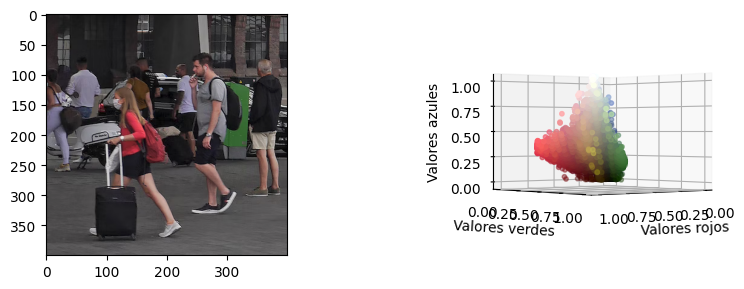

In [3]:
# Vamos a mostrarla primero
fig = plt.figure(figsize=(10,3))
fig.add_subplot(1, 2, 1)
plt.imshow(img)

ax = fig.add_subplot(1, 2, 2, projection='3d')

# La vamos a mostrar usando un scatter 3D, usaremos los canales RGB como
# coordenadas XYZ y cada bolita tendrá el color del píxel original
#
# Nota: Si tu imagen no está normalizada (los valores de tus píxeles no están en)
# el rango [0-1]) necesitas normalizarla. Si tu imagen tiene los píxeles con valores
# en el rango [0-255] usa la siguiente línea:
# colores = (img/255).reshape(data_points, 3)
colores = (img).reshape(data_points, 3)

# Separamos los canales para usarlos como coordenadas
r = img[:, :, 0].reshape(data_points, 1)
g = img[:, :, 1].reshape(data_points, 1)
b = img[:, :, 2].reshape(data_points, 1)

# Gráfica
ax.scatter(r, g, b, s=10, facecolor=colores)

# Le damos una elevación y un azimut para que se vean bien los puntos
ax.view_init(elev=0, azim=50)

ax.set_xlabel('Valores rojos')
ax.set_ylabel('Valores verdes')
ax.set_zlabel('Valores azules')
              
# Esto ajusta los bordes para que no se corte la imagen
plt.tight_layout()

In [4]:
def k_means(centroides, data_points, iteraciones_maximas=10):
    
    # Estructuras donde guardamos a qué clúster pertenece cada punto
    clusters = [[] for x in range(len(centroides))]
    indices = [[] for x in range(len(centroides))]
    
    centroides_anteriores = None

    # Bucle principal
    for i in range(iteraciones_maximas):
        
        # Le asignamos a cada punto el clúste más cercano
        for indice_del_punto, punto in enumerate(data_points):
            
            dist = float('inf')
            # Índice del centroide candidato
            centroide_candidato = 0
            
            for indice_del_centroide, centroide in enumerate(centroides):
                
                # Calculamos la distancia entre el punto y el centroide
                d = np.linalg.norm(punto-centroide)
                
                # Si estamos más cerca de este centroide, le 
                # asignamos a este punto ese centroide
                if d < dist:
                    dist = d
                    centroide_candidato = indice_del_centroide
            
            # Ahora sabemos que indice_del_punto pertenece a centroide_candidato
            clusters[centroide_candidato].append(punto)
            indices[centroide_candidato].append(indice_del_punto)
            
        # Ahora recalculamos los centroides haciendo la media por centroide
        centroides = ([np.mean(np.array(clusters[x]), axis=0) 
                      for x in range(len(centroides))])
        
        # Si los centroides no han cambiado, hemos llegado al límite
        # Hemos de usar ese generador porque tenemos un array de arrays de numpy
        if (centroides_anteriores != None 
            and not all([np.array_equal(x, y) 
                         for x, y in zip(centroides_anteriores, centroides)])):
            print("Saliendo del bucle")
            break
            
        # Actualizamos los centroides anteriores
        centroides_anteriores = centroides
        
    return (centroides, indices)

In [5]:
%%time
# Número de clusters
K = 5

# Le ponemos una seed conocida para que siempre salga lo miso
np.random.seed(424242)

# Cogemos K índices al azar
indices = np.random.randint(0, data_points-1, K)

# Cogemos los puntos a los que pertenecen esos índices
# estos serán nuestros centroides iniciales
centroides = img_lineal[indices]

centroides, indices = k_means(centroides, img_lineal)

Saliendo del bucle
CPU times: user 4.19 s, sys: 0 ns, total: 4.19 s
Wall time: 4.19 s


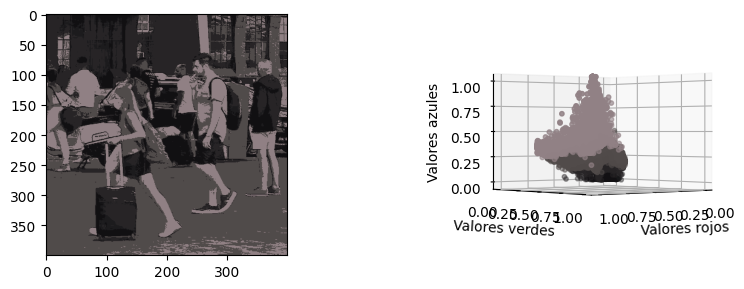

In [6]:
# Creamos una copia
img_a_mostrar = img_lineal.copy()

# Le asignaremos a cada punto el color de su clúster
for indice_del_cluster in range(K):
    for ind in indices[indice_del_cluster]:
        img_a_mostrar[ind] = centroides[indice_del_cluster]

# Lo preparamos todo
fig = plt.figure(figsize=(10,3))
fig.add_subplot(1, 2, 1)
plt.imshow(img_a_mostrar.reshape(anchura, altura, canales))

ax = fig.add_subplot(1, 2, 2, projection='3d')

colores = (img_a_mostrar).reshape(data_points, 3)

# Separamos los colres para usarlos como coordenadas
r = img[:, :, 0].reshape(data_points, 1)
g = img[:, :, 1].reshape(data_points, 1)
b = img[:, :, 2].reshape(data_points, 1)

# Gráfica
ax.scatter(r, g, b, s=10, facecolor=colores)

# Asignamos una elevación y un azimut para que se vean los puntos
ax.view_init(elev=0, azim=50)

ax.set_xlabel('Valores rojos')
ax.set_ylabel('Valores verdes')
ax.set_zlabel('Valores azules')
              
# Esto ajusta los bordes para que no se corte la imagen
plt.tight_layout()